In [152]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from config import db_password
import psycopg2

In [153]:
conn = psycopg2.connect(host="localhost", port = 5432, database="Group-Project", user="postgres", password=db_password)

In [154]:
cur = conn.cursor()

In [155]:
cur.execute("""SELECT * FROM breweries""")

In [156]:
query_results = cur.fetchall()
print(query_results)

[(0, '49th State Brewing Co Anchorage', 'Anchorage', ' Anchorage', 'AK', 2020), (1, 'Anchorage Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (2, 'Broken Tooth Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (3, 'Cynosure Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (4, 'Glacier Brewhouse', 'Anchorage', ' Anchorage', 'AK', 2020), (5, 'King Street Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (6, 'Magnetic North Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (7, 'Midnight Sun Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (8, 'Onsite Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (9, 'Resolution Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (10, 'Turnagain Brewing Co', 'Anchorage', ' Anchorage', 'AK', 2020), (11, 'Cooper Landing Brewing Co', 'Cooper Landing', ' Kenai Peninsula', 'AK', 2122), (12, 'HooDoo Brewing Co', 'Fairbanks', ' Fairbanks North St', 'AK', 2090), (13, 'Midnite Mine Brewing Co', 'Fairbanks', ' Fairbanks North St', 'AK'

In [157]:
brewery_df = pd.DataFrame(query_results,columns=['nums','Brewery','City','County','State','FIPS'])

In [158]:
brewery_df =brewery_df.iloc[:,[5,1,2,3,4,0]]

In [159]:
brewery_df.head()

,FIPS,Brewery,City,County,State,nums
0,2020,49th State Brewing Co Anchorage,Anchorage,Anchorage,AK,0
1,2020,Anchorage Brewing Co,Anchorage,Anchorage,AK,1
2,2020,Broken Tooth Brewing Co,Anchorage,Anchorage,AK,2
3,2020,Cynosure Brewing Co,Anchorage,Anchorage,AK,3
4,2020,Glacier Brewhouse,Anchorage,Anchorage,AK,4


In [160]:
droprange=list(range(2,6))
brewery_df.drop(brewery_df.columns[droprange],axis=1, inplace=True)
brewery_df.head()


,FIPS,Brewery
0,2020,49th State Brewing Co Anchorage
1,2020,Anchorage Brewing Co
2,2020,Broken Tooth Brewing Co
3,2020,Cynosure Brewing Co
4,2020,Glacier Brewhouse


In [161]:
brewery_count=brewery_df.groupby('FIPS').size()
print(brewery_count)

FIPS
1003     3
1015     1
1043     1
1055     1
1069     1
        ..
56035    1
56037    1
56039    4
56041    1
56043    1
Length: 1415, dtype: int64


In [162]:
brewery_df=pd.DataFrame(brewery_count,columns=['FIPS','brewery count'])
brewery_df.head()

ValueError: Shape of passed values is (1415, 1), indices imply (1415, 2)

In [163]:
brewery_df.rename(brewery_df.columns[1]: 'num or breweries',inplace=True)

SyntaxError: invalid syntax (<ipython-input-163-e4c14d42f8c4>, line 1)

In [164]:
cur.execute("""SELECT * FROM """)

SyntaxError: syntax error at end of input
LINE 1: SELECT * FROM 
                      ^


In [165]:
UIC_df = pd.read_csv('../Resources/data/UIC_codes.csv')
UIC_df.sort_values('FIPS').head()

,FIPS,State,County_Name,County,Population_2010,UIC_2013,Description,City/Suburb/Town/Rural
472,1001,AL,Autauga County,Autauga,"54,571",2,Small-in a metro area with fewer than 1 millio...,City
473,1003,AL,Baldwin County,Baldwin,"182,265",2,Small-in a metro area with fewer than 1 millio...,City
1762,1005,AL,Barbour County,Barbour,"27,457",6,Noncore adjacent to a small metro with town of...,Town
0,1007,AL,Bibb County,Bibb,"22,915",1,Large-in a metro area with at least 1 million ...,City
1,1009,AL,Blount County,Blount,"57,322",1,Large-in a metro area with at least 1 million ...,City


In [166]:
UIC_df.dtypes

FIPS                       int64
State                     object
County_Name               object
County                    object
Population_2010           object
UIC_2013                   int64
Description               object
City/Suburb/Town/Rural    object
dtype: object

In [167]:
UIC_df['Population_2010']=UIC_df['Population_2010'].str.replace(",","").astype('int64')
#UIC_df['Population_2010']=UIC_df['Population_2010'].astype(int,errors='raise')
UIC_df.dtypes


FIPS                       int64
State                     object
County_Name               object
County                    object
Population_2010            int64
UIC_2013                   int64
Description               object
City/Suburb/Town/Rural    object
dtype: object

In [168]:
unemployment_df = pd.read_csv('../Resources/data/unemployment.csv')
unemployment_df.head()

,FIPS_Code,State,Area_name,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",Bibb,1.0,1.0,City,1.0,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",Blount,1.0,1.0,City,1.0,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,"Chilton County, AL",Chilton,1.0,1.0,City,1.0,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,"Jefferson County, AL",Jefferson,1.0,1.0,City,1.0,"315,957","296,282","19,675",6.2,"54,127",104.6
4,1115,AL,"St. Clair County, AL",St. Clair,1.0,1.0,City,1.0,"40,132","38,146","1,986",4.9,"65,403",126.3


In [169]:
unemployment_df.columns

Index(['FIPS_Code', 'State', 'Area_name', 'County',
       'Rural_urban_continuum_code_2013', 'Urban_influence_code_2013',
       'City/Suburb/Town/Rural', 'Metro_2013', 'Civilian_labor_force_2020',
       'Employed_2020', 'Unemployed_2020', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

In [170]:
#droprange = list(range(6,88))
#unemployment_df.drop(unemployment_df.columns[droprange],axis = 1,inplace=True)
unemployment_df.dropna(axis=0,how='any',inplace=True)

In [171]:
unemployment_df.sort_values('FIPS_Code')

,FIPS_Code,State,Area_name,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
472,1001,AL,"Autauga County, AL",Autauga,2.0,2.0,City,1.0,"25,838","24,576","1,262",4.9,"58,233",112.5
473,1003,AL,"Baldwin County, AL",Baldwin,3.0,2.0,City,1.0,"96,763","91,338","5,425",5.6,"59,871",115.6
1760,1005,AL,"Barbour County, AL",Barbour,6.0,6.0,Town,0.0,"8,587","7,982",605,7.0,"35,972",69.5
0,1007,AL,"Bibb County, AL",Bibb,1.0,1.0,City,1.0,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",Blount,1.0,1.0,City,1.0,"24,661","23,653","1,008",4.1,"52,902",102.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,56037,WY,"Sweetwater County, WY",Sweetwater,5.0,8.0,Town,0.0,"20,840","19,308","1,532",7.4,"80,639",121.9
2535,56039,WY,"Teton County, WY",Teton,7.0,8.0,Town,0.0,"15,204","14,292",912,6.0,"98,837",149.4
2536,56041,WY,"Uinta County, WY",Uinta,7.0,8.0,Town,0.0,"9,312","8,730",582,6.3,"70,756",107.0
3034,56043,WY,"Washakie County, WY",Washakie,7.0,11.0,Rural,0.0,"4,004","3,793",211,5.3,"55,122",83.3


In [172]:
#remove County_Name and Description from UIC_df it directly correlates with FIPS
UIC_df=UIC_df.drop(['County_Name','Description'],axis=1)
UIC_df.sort_values(['Population_2010'],ascending=False).head(10)

,FIPS,State,County,Population_2010,UIC_2013,City/Suburb/Town/Rural
13,6037,CA,Los Angeles,9818605,1,City
89,17031,IL,Cook,5194675,1,City
350,48201,TX,Harris,4092459,1,City
7,4013,AZ,Maricopa,3817117,1,City
21,6073,CA,San Diego,3095313,1,City
15,6059,CA,Orange,3010232,1,City
235,36047,NY,Kings,2504700,1,City
48,12086,FL,Miami-Dade,2496435,1,City
344,48113,TX,Dallas,2368139,1,City
245,36081,NY,Queens,2230722,1,City


In [173]:
#Remove area_name it correlates with FIPS_Code
unemployment_df=unemployment_df.drop('Area_name',axis=1)
unemployment_df

,FIPS_Code,State,County,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,Bibb,1.0,1.0,City,1.0,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,Blount,1.0,1.0,City,1.0,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,Chilton,1.0,1.0,City,1.0,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,Jefferson,1.0,1.0,City,1.0,"315,957","296,282","19,675",6.2,"54,127",104.6
4,1115,AL,St. Clair,1.0,1.0,City,1.0,"40,132","38,146","1,986",4.9,"65,403",126.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,55099,WI,Price,9.0,12.0,Rural,0.0,"6,209","5,785",424,6.8,"48,761",76.0
3213,55113,WI,Sawyer,7.0,12.0,Rural,0.0,"7,910","7,289",621,7.9,"53,908",84.0
3214,55125,WI,Vilas,9.0,12.0,Rural,0.0,"10,221","9,480",741,7.2,"55,576",86.6
3215,56003,WY,Big Horn,9.0,12.0,Rural,0.0,"5,381","5,112",269,5.0,"53,018",80.1


In [214]:
county_merge_df=pd.merge(UIC_df,unemployment_df,how='inner',left_on='FIPS',right_on='FIPS_Code')
county_merge_df=county_merge_df.drop(['Metro_2013','Civilian_labor_force_2020','County_x','County_y','State_y','City/Suburb/Town/Rural_y','FIPS_Code','Urban_influence_code_2013','City/Suburb/Town/Rural_x','Rural_urban_continuum_code_2013'],axis=1)
county_merge_df.rename(columns={'State_x':'State'},inplace=True)
county_merge_df['Employed_2020']=county_merge_df['Employed_2020'].str.replace(",","").astype('int64')
county_merge_df['Median_Household_Income_2019']=county_merge_df['Median_Household_Income_2019'].str.replace(",","").astype('int64')
county_merge_df['Unemployed_2020']=county_merge_df['Unemployed_2020'].str.replace(",","").astype('int64')

#UIC_df['Population_2010']=UIC_df['Population_2010'].str.replace(",","").astype('int64')
county_merge_df

,FIPS,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,22915,1,8067,573,6.6,47918,92.6
1,1009,AL,57322,1,23653,1008,4.1,52902,102.2
2,1021,AL,43643,1,18618,974,5.0,49692,96.0
3,1073,AL,658466,1,296282,19675,6.2,54127,104.6
4,1115,AL,83593,1,38146,1986,4.9,65403,126.3
...,...,...,...,...,...,...,...,...,...
3134,55099,WI,14159,12,5785,424,6.8,48761,76.0
3135,55113,WI,16557,12,7289,621,7.9,53908,84.0
3136,55125,WI,21430,12,9480,741,7.2,55576,86.6
3137,56003,WY,11668,12,5112,269,5.0,53018,80.1


In [215]:
county_merge_df.dtypes

FIPS                                           int64
State                                         object
Population_2010                                int64
UIC_2013                                       int64
Employed_2020                                  int64
Unemployed_2020                                int64
Unemployment_rate_2020                       float64
Median_Household_Income_2019                   int64
Med_HH_Income_Percent_of_State_Total_2019    float64
dtype: object

In [216]:
cols_used=county_merge_df.columns
cols_used=cols_used[1:9]
cols_used

Index(['State', 'Population_2010', 'UIC_2013', 'Employed_2020',
       'Unemployed_2020', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

In [217]:
X=county_merge_df[cols_used].copy()

In [218]:
X['State']=LabelEncoder().fit_transform(X['State'])
X.head()
X.describe()


,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
count,3139.000000,3.139000e+03,3139.000000,3.139000e+03,3139.000000,3139.000000,3139.000000,3139.000000
mean,26.021982,9.834921e+04,5.266327,4.704439e+04,4120.106085,6.738229,55726.833705,89.480599
std,14.186879,3.130835e+05,3.498399,1.493367e+05,17048.531628,2.272531,14485.143738,19.830290
min,0.000000,8.200000e+01,1.000000,1.740000e+02,4.000000,1.700000,24732.000000,39.900000
25%,14.000000,1.113500e+04,2.000000,4.510500e+03,294.500000,5.200000,46259.000000,76.450000
50%,25.000000,2.589300e+04,5.000000,1.074600e+04,772.000000,6.500000,53344.000000,86.800000
75%,40.000000,6.693500e+04,8.000000,2.936050e+04,2196.500000,8.000000,62063.000000,99.500000
max,50.000000,9.818605e+06,12.000000,4.291688e+06,629811.000000,22.500000,151806.000000,234.500000


In [219]:
X_scaled=MinMaxScaler().fit_transform(X)
X_scaled

array([[2.00000000e-02, 2.32550252e-03, 0.00000000e+00, ...,
        2.35576923e-01, 1.82460614e-01, 2.70811922e-01],
       [2.00000000e-02, 5.82979741e-03, 0.00000000e+00, ...,
        1.15384615e-01, 2.21681855e-01, 3.20143885e-01],
       [2.00000000e-02, 4.43661435e-03, 0.00000000e+00, ...,
        1.58653846e-01, 1.96420983e-01, 2.88283659e-01],
       ...,
       [9.60000000e-01, 2.17425778e-03, 1.00000000e+00, ...,
        2.64423077e-01, 2.42724712e-01, 2.39979445e-01],
       [1.00000000e+00, 1.18001455e-03, 1.00000000e+00, ...,
        1.58653846e-01, 2.22594709e-01, 2.06577595e-01],
       [1.00000000e+00, 2.44639647e-04, 1.00000000e+00, ...,
        1.00961538e-01, 1.87142925e-01, 1.71634121e-01]])

C:\Users\erict\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  f"KMeans is known to have a memory leak on Windows "


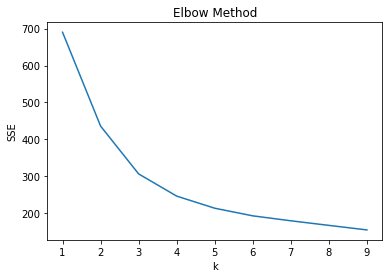

In [220]:
sse = {}
K = range(1, 10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [221]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

In [222]:
y_pred=model.predict(X_scaled)
print(y_pred)

[2 2 2 ... 3 3 3]


In [223]:
df_y=pd.DataFrame(y_pred,columns=['Cluster'])
df_y.head()

,Cluster
0,2
1,2
2,2
3,2
4,2


In [224]:
county_cluster_df=county_merge_df.join(df_y,how='inner')
county_cluster_df.head()

,FIPS,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
0,1007,AL,22915,1,8067,573,6.6,47918,92.6,2
1,1009,AL,57322,1,23653,1008,4.1,52902,102.2,2
2,1021,AL,43643,1,18618,974,5.0,49692,96.0,2
3,1073,AL,658466,1,296282,19675,6.2,54127,104.6,2
4,1115,AL,83593,1,38146,1986,4.9,65403,126.3,2


In [225]:
county_cluster_df.dtypes

FIPS                                           int64
State                                         object
Population_2010                                int64
UIC_2013                                       int64
Employed_2020                                  int64
Unemployed_2020                                int64
Unemployment_rate_2020                       float64
Median_Household_Income_2019                   int64
Med_HH_Income_Percent_of_State_Total_2019    float64
Cluster                                        int32
dtype: object

In [226]:
county_cluster_df.describe()

,FIPS,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
count,3139.000000,3.139000e+03,3139.000000,3.139000e+03,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000
mean,30392.532972,9.834921e+04,5.266327,4.704439e+04,4120.106085,6.738229,55726.833705,89.480599,1.428799
std,15156.298611,3.130835e+05,3.498399,1.493367e+05,17048.531628,2.272531,14485.143738,19.830290,1.086278
min,1001.000000,8.200000e+01,1.000000,1.740000e+02,4.000000,1.700000,24732.000000,39.900000,0.000000
25%,18180.000000,1.113500e+04,2.000000,4.510500e+03,294.500000,5.200000,46259.000000,76.450000,0.000000
50%,29177.000000,2.589300e+04,5.000000,1.074600e+04,772.000000,6.500000,53344.000000,86.800000,1.000000
75%,45080.000000,6.693500e+04,8.000000,2.936050e+04,2196.500000,8.000000,62063.000000,99.500000,2.000000
max,56045.000000,9.818605e+06,12.000000,4.291688e+06,629811.000000,22.500000,151806.000000,234.500000,3.000000


In [227]:
county_cluster_df['Cluster'].value_counts().head()

2    887
0    825
1    785
3    642
Name: Cluster, dtype: int64

In [228]:
county_cluster_df.head(10)

,FIPS,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
0,1007,AL,22915,1,8067,573,6.6,47918,92.6,2
1,1009,AL,57322,1,23653,1008,4.1,52902,102.2,2
2,1021,AL,43643,1,18618,974,5.0,49692,96.0,2
3,1073,AL,658466,1,296282,19675,6.2,54127,104.6,2
4,1115,AL,83593,1,38146,1986,4.9,65403,126.3,2
5,1117,AL,195085,1,109646,4402,3.9,77801,150.3,2
6,1127,AL,67023,1,23431,1446,5.8,45991,88.8,2
7,4013,AZ,3817117,1,2159267,172361,7.4,68634,110.7,2
8,4021,AZ,375770,1,176674,14400,7.5,62067,100.1,2
9,5035,AR,50902,1,19459,1750,8.3,41976,85.6,2


In [229]:
county_cluster0_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==0)]
county_cluster0_df.head()

,FIPS,State,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
1447,1047,AL,43820,5,13049,1570,10.7,34034,65.7,0
1451,4017,AZ,107449,5,36322,4097,10.1,40676,65.6,0
1457,6033,CA,64665,5,25567,2700,9.6,46897,58.3,0
1464,12027,FL,34862,5,13615,741,5.2,41673,70.4,0
1467,13055,GA,26015,5,8947,820,8.4,41561,67.1,0


In [230]:
county_cluster1_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==1)]

In [231]:
county_cluster2_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==2)]

In [232]:
county_cluster3_df=county_cluster_df.loc[(county_cluster_df["Cluster"]==3)]

In [233]:
output_data_file = "../../../cluster0.csv"

In [234]:
county_cluster0_df.to_csv(output_data_file)

In [235]:
output_data_file = "../../../cluster1.csv"

In [236]:
county_cluster1_df.to_csv(output_data_file)

In [237]:
output_data_file = "../../../cluster2.csv"

In [238]:
county_cluster2_df.to_csv(output_data_file)

In [239]:
output_data_file = "../../../cluster3.csv"

In [240]:
county_cluster3_df.to_csv(output_data_file)

In [245]:
output_data_file = "../../../cluster.csv"

In [246]:
county_cluster_df.to_csv(output_data_file)

In [241]:
county_cluster0_df.describe()

,FIPS,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.0
mean,18778.642424,18838.132121,8.283636,7616.329697,563.121212,6.588121,48709.080000,80.720485,0.0
std,8595.072404,16828.510957,2.026412,7089.157386,671.614829,2.494261,10619.139486,14.049238,0.0
min,1005.000000,662.000000,5.000000,238.000000,12.000000,1.700000,24732.000000,39.900000,0.0
25%,13201.000000,8375.000000,6.000000,3112.000000,198.000000,4.800000,41405.000000,70.500000,0.0
50%,20039.000000,14400.000000,8.000000,5586.000000,391.000000,6.200000,47764.000000,80.200000,0.0
75%,26123.000000,24233.000000,10.000000,9386.000000,712.000000,7.900000,55247.000000,90.100000,0.0
max,37199.000000,185079.000000,12.000000,78986.000000,10133.000000,21.500000,96030.000000,124.600000,0.0


In [242]:
county_cluster1_df.describe()

,FIPS,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
count,785.000000,7.850000e+02,785.000000,7.850000e+02,785.000000,785.000000,785.000000,785.000000,785.0
mean,45163.908280,1.570271e+05,2.477707,7.646510e+04,6744.607643,7.260382,61663.812739,95.075669,1.0
std,6511.641329,3.146908e+05,1.389584,1.577016e+05,16389.185696,2.021636,16076.872827,22.277953,0.0
min,31001.000000,1.226000e+03,1.000000,7.070000e+02,29.000000,2.900000,32516.000000,47.200000,1.0
25%,39167.000000,2.747100e+04,1.000000,1.181400e+04,866.000000,5.800000,51012.000000,80.500000,1.0
50%,47101.000000,5.821800e+04,2.000000,2.507500e+04,1934.000000,7.100000,58739.000000,91.400000,1.0
75%,51029.000000,1.368850e+05,3.000000,6.871100e+04,4982.000000,8.400000,68311.000000,105.500000,1.0
max,56025.000000,4.092459e+06,6.000000,2.088449e+06,204310.000000,17.800000,151806.000000,234.500000,1.0


In [243]:
county_cluster2_df.describe()

,FIPS,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
count,887.000000,8.870000e+02,887.000000,8.870000e+02,887.000000,887.000000,887.000000,887.000000,887.0
mean,18790.085682,1.803447e+05,2.349493,8.698162e+04,7744.075536,6.938219,60052.421646,97.470800,2.0
std,9380.948625,4.883158e+05,1.276483,2.278107e+05,27393.766373,1.969804,15159.141837,20.055063,0.0
min,1001.000000,8.840000e+02,1.000000,3.460000e+02,17.000000,2.700000,29318.000000,44.700000,2.0
25%,13028.000000,2.547150e+04,1.000000,1.087300e+04,709.000000,5.500000,49827.500000,83.950000,2.0
50%,18137.000000,5.732200e+04,2.000000,2.528400e+04,1845.000000,6.700000,57078.000000,94.300000,2.0
75%,26092.000000,1.545960e+05,3.000000,7.257300e+04,5557.000000,7.900000,66579.500000,107.650000,2.0
max,37197.000000,9.818605e+06,5.000000,4.291688e+06,629811.000000,22.500000,135234.000000,193.600000,2.0


In [244]:
county_cluster3_df.describe()

,FIPS,Population_2010,UIC_2013,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,Cluster
count,642.000000,642.00000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.0
mean,43285.524922,15490.20405,8.828660,6559.306854,474.962617,6.016355,51509.266355,82.857009,3.0
std,7906.481766,15756.33693,2.073212,7087.198257,577.481391,2.445933,9908.970888,15.460083,0.0
min,30001.000000,82.00000,6.000000,174.000000,4.000000,1.700000,26671.000000,44.100000,3.0
25%,38005.500000,4218.50000,7.000000,1812.500000,84.000000,4.100000,44403.750000,72.625000,3.0
50%,46046.000000,9520.50000,9.000000,4050.000000,256.500000,5.700000,50726.000000,81.850000,3.0
75%,48416.500000,21647.50000,10.000000,8677.750000,651.000000,7.600000,57552.500000,91.625000,3.0
max,56045.000000,89513.00000,12.000000,66898.000000,4195.000000,16.100000,98837.000000,149.400000,3.0
